In [1]:
import ROOT as root
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.14/04


[[0. 0.]]
('media = ', 0.013167290746076657, 'std = ', 1.0089174115679012)


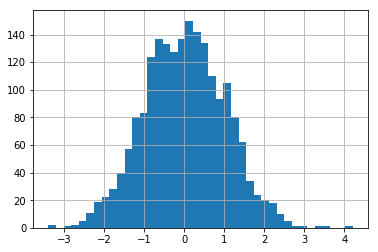

Error in <TTreeReaderValueBase::GetBranchDataType()>: Must use TTreeReaderArray to read branch x: it contains an array or a collection.
Error in <TTreeReaderValueBase::CreateProxy()>: The branch x contains data of type {UNDETERMINED TYPE}, which does not have a dictionary.


In [2]:
from sys import exit

#NON ESEGUIRE IL PROGRAMMA! IL FILE dati.root NON ESISTE PIU! 

fileROOT = root.TFile("dati.root") #nome del rootfile
tree = fileROOT.Get("datatree") #nome del datatree

dataset = [] #creo una lista in cui inserire i dati

array = tree.AsMatrix()

print(array)

for dat in tree:
    dataset.extend(dat.x) #salvo i dati della leaf (in questo caso chiamata x) interessata dentro dataset
    
dataset = np.array(dataset)#converto la lista in un ndarray per una lettura più veloce
print('media = ' , np.mean(dataset) , 'std = ' ,  np.std(dataset))
#stampo i dati in un istogramma
plt.hist(dataset, bins=40)
plt.grid()
plt.show()

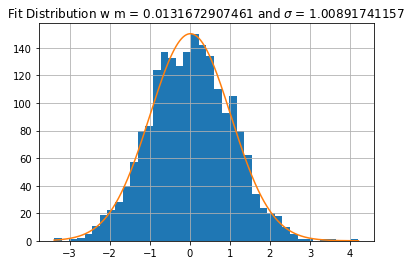

area = 380.01


In [3]:
import scipy.stats as st #importo la libreria utile al fit

l = np.linspace(min(dataset) , max(dataset) , len(dataset)) #creo un array della stessa lunghezza di dataset 
                                                            #che va dal min al max del dataset 

#istogramma di appoggio che serve per riscalare il fit
y,x,_ = plt.hist(dataset , bins = 40 , density = True , color = 'w') 

m,s = st.norm.fit(dataset) #fa il fit con una distribuzione normale di dataset usando come 
                                       #parametri m ed s
pdf = st.norm.pdf(l , m , s) #salva in pdf i valori di pdf corrispondenti a m ,s per i dati contenuti in l

#istogramma dei dati definitivo
y1 , x1 , _ = plt.hist(dataset , bins = 40 , density = False)
plt.plot(l , pdf*y1.max()/y.max()) 
plt.grid()
plt.title('Fit Distribution w m = {0} and $\sigma$ = {1}'.format(m , s))
plt.show()
#print(y.max() , y1.max() , y.max()/y.max())


#calcolo dell'area dell'istogramma
from decimal import Decimal
area = sum(np.diff(x1)*y1)
print("area = {0:.2f}".format(area)) #stampo l'area con una precisione di 2 decimali


In [4]:
import ROOT
from sys import exit

try:
    import numpy as np
except:
    print("Failed to import numpy.")
    exit()
# Helper function to create an example tree
def make_example():
    root_file = ROOT.TFile("pyroot002_example.root", "RECREATE")
    tree = ROOT.TTree("tree", "tutorial")
    x = np.empty((1), dtype="float32")
    y = np.empty((1), dtype="float32")
    tree.Branch("x", x, "x/F")
    tree.Branch("y", y, "y/F")
    for i in range(4):
        x[0] = i
        y[0] = -i
        tree.Fill()
    root_file.Write()
    return (root_file, x, y), tree
# The conversion of the TTree to a numpy array is implemented with multi-
# thread support.
ROOT.ROOT.EnableImplicitMT()
# Create a ROOT file with a tree and the branches "x" and "y"
_, tree = make_example()
# Print content of the tree by looping explicitly
print("Tree content:\n{}\n".format(
    np.asarray([[tree.x, tree.y] for event in tree])))
# Read-out full tree as numpy array
array = tree.AsMatrix()
print("Tree converted to a numpy array:\n{}\n".format(array))
# Get numpy array and according labels of the columns
array, labels = tree.AsMatrix(return_labels=True)
print("Return numpy array and labels:\n{}\n{}\n".format(labels, array))
# Apply numpy methods on the data
print("Mean of the columns retrieved with a numpy method: {}\n".format(
    np.mean(array, axis=0)))
# Read only specific branches
array = tree.AsMatrix(columns=["x"])
print("Only the content of the branch 'x':\n{}\n".format(np.squeeze(array)))
array = tree.AsMatrix(exclude=["x"])
print("Read all branches except 'x':\n{}\n".format(np.squeeze(array)))
# Get an array with a specific data-type
array = tree.AsMatrix(dtype="int")
print("Return numpy array with data-type 'int':\n{}\n".format(array))
## Convert the tree to a pandas.DataFrame
try:
    import pandas
except:
    print("Failed to import pandas.")
    exit()
data, columns = tree.AsMatrix(return_labels=True)
df = pandas.DataFrame(data=data, columns=columns)
print("Tree converted to a pandas.DataFrame:\n{}".format(df))

Tree content:
[[ 0.  0.]
 [ 1. -1.]
 [ 2. -2.]
 [ 3. -3.]]

Tree converted to a numpy array:
[[ 0.  0.]
 [ 1. -1.]
 [ 2. -2.]
 [ 3. -3.]]

Return numpy array and labels:
['x', 'y']
[[ 0.  0.]
 [ 1. -1.]
 [ 2. -2.]
 [ 3. -3.]]

Mean of the columns retrieved with a numpy method: [ 1.5 -1.5]

Only the content of the branch 'x':
[0. 1. 2. 3.]

Read all branches except 'x':
[ 0. -1. -2. -3.]

Return numpy array with data-type 'int':
[[ 0  0]
 [ 1 -1]
 [ 2 -2]
 [ 3 -3]]

Tree converted to a pandas.DataFrame:
     x    y
0  0.0  0.0
1  1.0 -1.0
2  2.0 -2.0
3  3.0 -3.0
